In [10]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.9 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
data = pd.read_csv('/content/Salary Prediction of Data Professions.csv')

In [13]:
data

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


# Data Pre-Processing and EDA

We will be removing firstname and last name from our dataset as these columns are not required for our data analysis or prediction and those column doesnot contribute anything in salary prediction.

In [14]:
data.drop(columns=['FIRST NAME', 'LAST NAME'], axis=1, inplace=True)
data

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...
2634,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


Checking for null values

In [15]:
data.isnull().sum()

SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

Replacing missing values with mean and mode.
We have very less missing values so it wont matter much but on safer side for some columns we have replaced by mean and for some we have replaced my mode.  

In [16]:
data['AGE'].fillna(int(data['AGE'].mean()), inplace=True)
data['LEAVES USED'].fillna(int(data['LEAVES USED'].mean()), inplace=True)
data['LEAVES REMAINING'].fillna(int(data['LEAVES REMAINING'].mean()), inplace=True)
data['RATINGS'].fillna(int(data['RATINGS'].mean()), inplace=True)
data['DOJ'].fillna(data['DOJ'].mode()[0], inplace=True)

In [17]:
data.isnull().sum()

SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

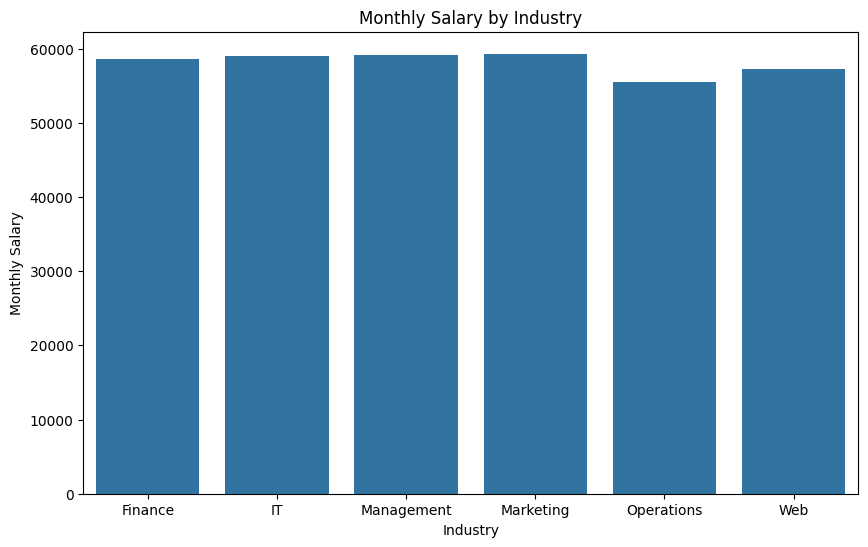

In [18]:
grouped_data = data.groupby('UNIT')['SALARY'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

plt.title('Monthly Salary by Industry')
plt.xlabel('Industry')
plt.ylabel('Monthly Salary')
plt.show()


So the Salary in every industry is more or less the same according to our data.

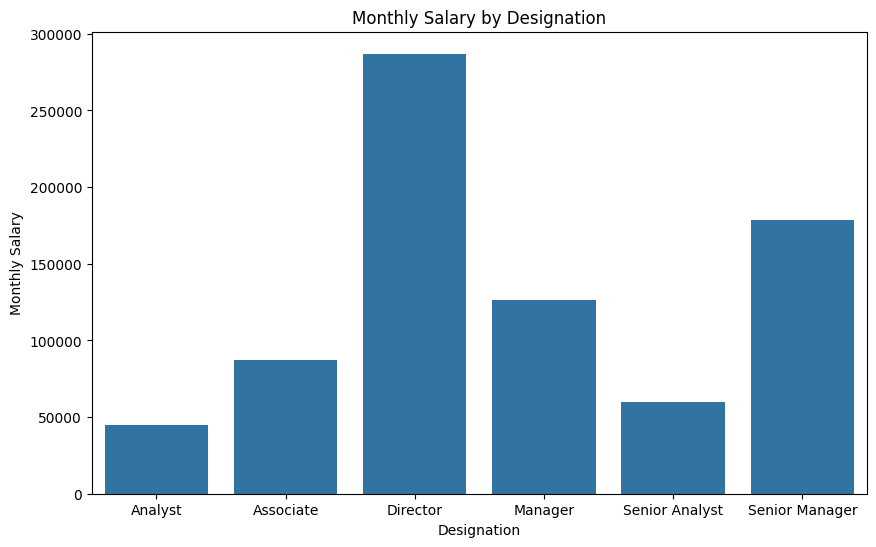

In [19]:
grouped_data = data.groupby('DESIGNATION')['SALARY'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

plt.title('Monthly Salary by Designation')
plt.xlabel('Designation')
plt.ylabel('Monthly Salary')
plt.show()


But the salary differs when it comes to position. Director position has most salry followed by Senior Manager.

<ipython-input-20-7085d906df90>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SALARY'])


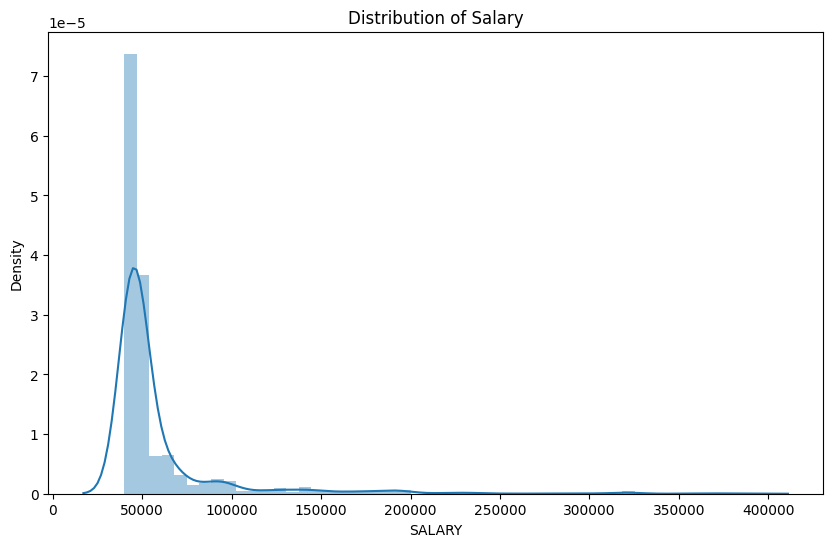

In [20]:
plt.figure(figsize=(10, 6))
sns.distplot(data['SALARY'])
plt.title('Distribution of Salary')
plt.show()


All the salaries are between 50000 to 100000.

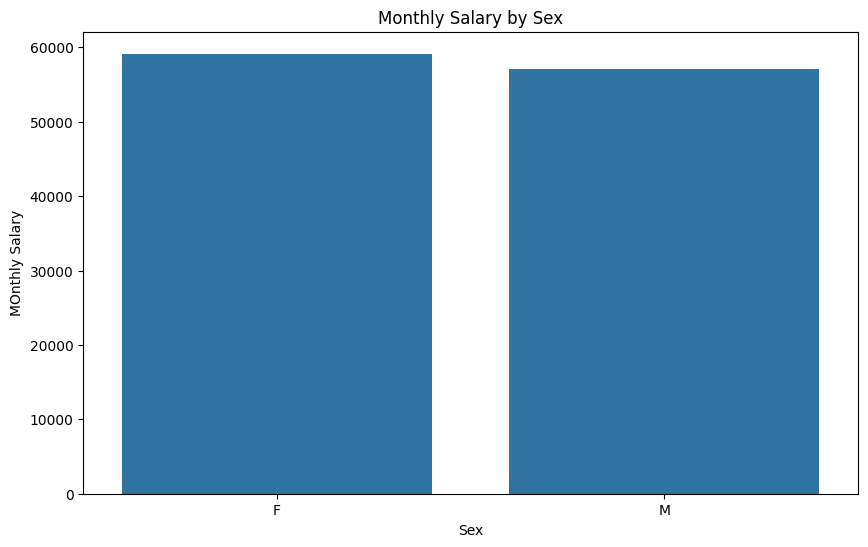

In [21]:
grouped_data = data.groupby('SEX')['SALARY'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)

plt.title('Monthly Salary by Sex')
plt.xlabel('Sex')
plt.ylabel('MOnthly Salary')
plt.show()


Women tend to have slighlty more salary than men

<ipython-input-22-0e989f1c6b8d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PAST EXP'], hist=False, color="r", label="Past Experience")
<ipython-input-22-0e989f1c6b8d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['RATINGS'], hist=False, color="b", label="Rat

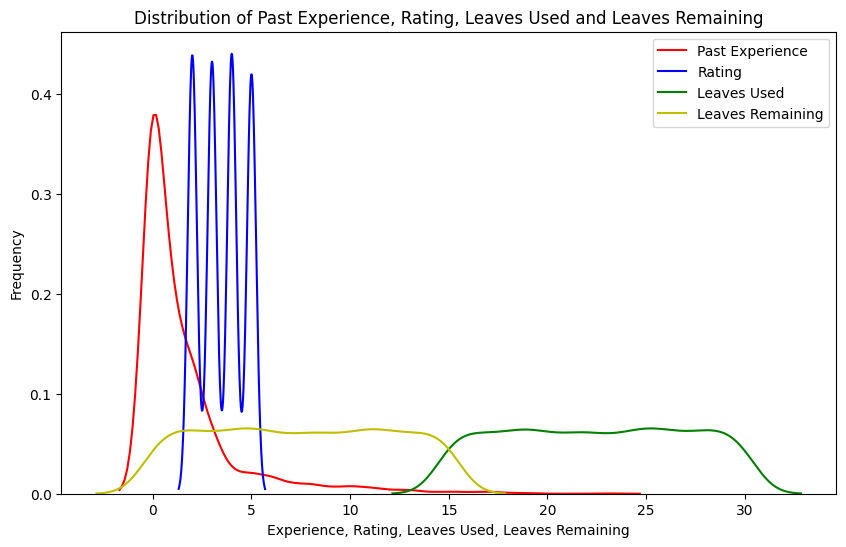

In [22]:
plt.figure(figsize=(10, 6))
sns.distplot(data['PAST EXP'], hist=False, color="r", label="Past Experience")
sns.distplot(data['RATINGS'], hist=False, color="b", label="Rating")
sns.distplot(data['LEAVES USED'],hist=False,color="g",label="Leaves Used")
sns.distplot(data['LEAVES REMAINING'],hist=False,color="y",label="Leaves Remaining")
plt.title('Distribution of Past Experience, Rating, Leaves Used and Leaves Remaining')
plt.xlabel('Experience, Rating, Leaves Used, Leaves Remaining')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Feature Engineering

In [23]:
data['DOJ'] = pd.to_datetime(data['DOJ'])
data['CURRENT DATE'] = pd.to_datetime(data['CURRENT DATE'])

In [24]:
data['PRESENT EXP'] = data['CURRENT DATE'] - data['DOJ']
data.head()


,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,PRESENT EXP
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,599 days
1,F,2013-10-19,2016-01-07,Associate,24.0,89207,Web,22.0,13.0,3.0,7,810 days
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,528 days
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,1009 days
4,M,2014-11-20,2016-01-07,Analyst,24.0,43161,Operations,27.0,3.0,3.0,3,413 days


In [25]:
data['PRESENT EXP'] = data['PRESENT EXP'] / np.timedelta64(1, 'Y')
data['PRESENT EXP'] = data['PRESENT EXP'].astype(int)
data.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,PRESENT EXP
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1
1,F,2013-10-19,2016-01-07,Associate,24.0,89207,Web,22.0,13.0,3.0,7,2
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2
4,M,2014-11-20,2016-01-07,Analyst,24.0,43161,Operations,27.0,3.0,3.0,3,1


In [26]:
data['TOTAL EXP'] = data['PRESENT EXP'] + data['PAST EXP']
data.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,PRESENT EXP,TOTAL EXP
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1,1
1,F,2013-10-19,2016-01-07,Associate,24.0,89207,Web,22.0,13.0,3.0,7,2,9
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1,1
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2,2
4,M,2014-11-20,2016-01-07,Analyst,24.0,43161,Operations,27.0,3.0,3.0,3,1,4


We have used DOJ and Current Date columns and we dont need them now so we can drop them.

In [27]:
data.drop(columns=['DOJ', 'CURRENT DATE','PAST EXP','PRESENT EXP'], axis=1, inplace=True)
data


,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,TOTAL EXP
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,1
1,F,Associate,24.0,89207,Web,22.0,13.0,3.0,9
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,1
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,2
4,M,Analyst,24.0,43161,Operations,27.0,3.0,3.0,4
...,...,...,...,...,...,...,...,...,...
2634,F,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,14
2635,F,Analyst,23.0,45758,IT,17.0,13.0,2.0,1
2636,F,Analyst,21.0,47315,Web,29.0,1.0,5.0,1
2637,F,Analyst,24.0,45172,Web,23.0,7.0,3.0,2


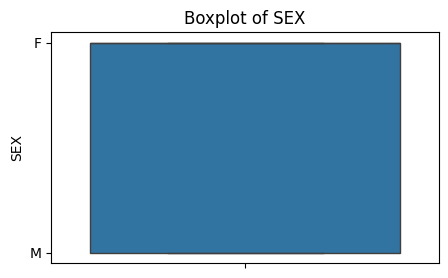

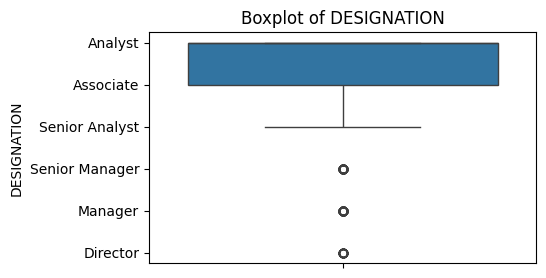

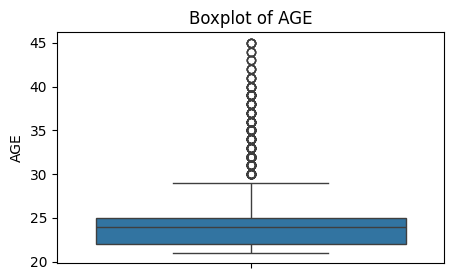

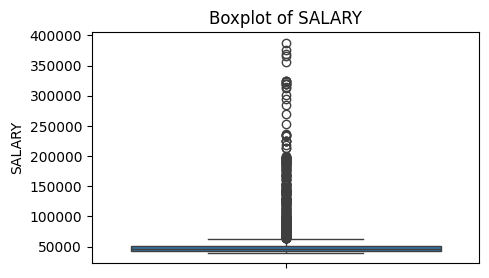

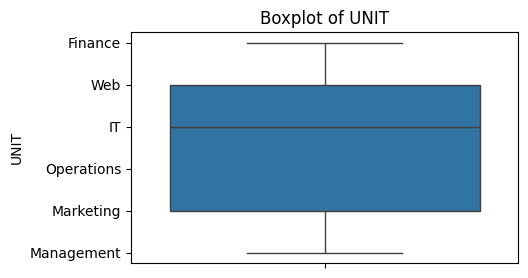

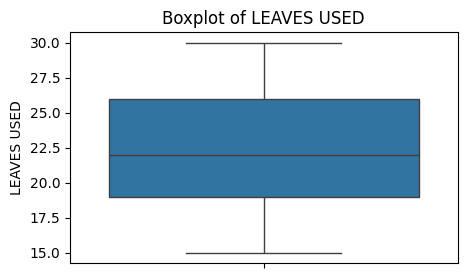

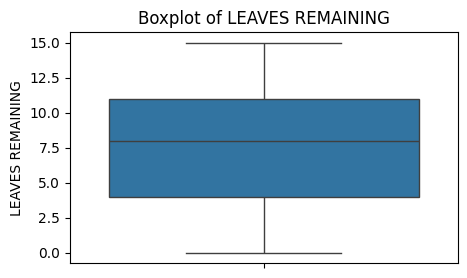

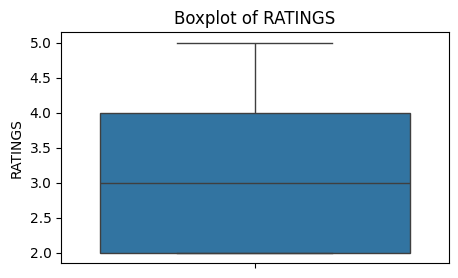

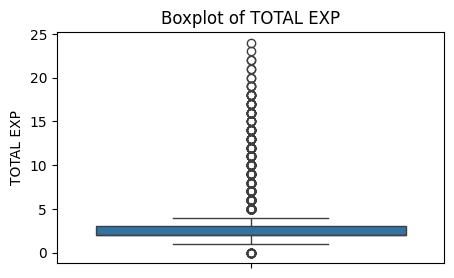

In [28]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for each column in the DataFrame
for column in data.columns:
  plt.figure(figsize=(5, 3))
  sns.boxplot(y=data[column])
  plt.title(f"Boxplot of {column}")
  plt.show()


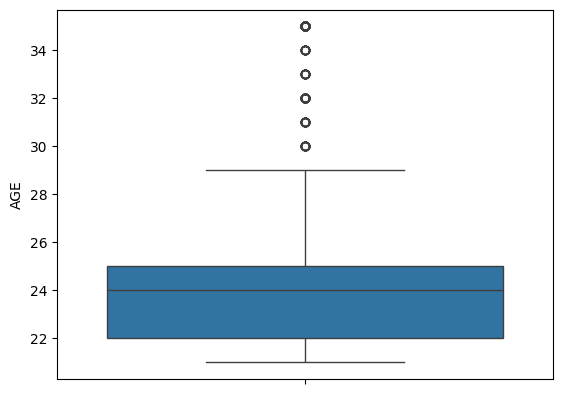

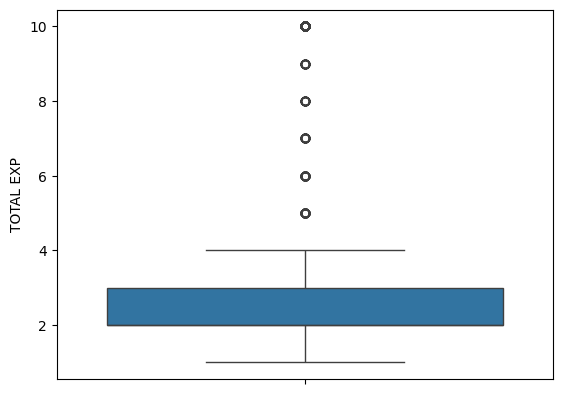

In [29]:
data['AGE'] = data['AGE'].apply(lambda x: 35 if x > 35 else x)
sns.boxplot(y=data['AGE'])
plt.show()
data['TOTAL EXP'] = data['TOTAL EXP'].apply(lambda x: 10 if x > 10 else (1 if x < 1 else x))
sns.boxplot(y=data['TOTAL EXP'])
plt.show()

Few outliers are still bareable as they are not causing much data damage.

Since in our dataset we have outliers present in age and total experience columns it is not of a big deal as people may have more and and more experience than normal. So it is good to take those cases as well for our analysis so that the model also understands extreme value and predict better.


# Data Pre-Processing

Converting Categorical variable to numeric variable.

In [30]:
le = LabelEncoder()
data['UNIT'] = le.fit_transform(data['UNIT'])
data['DESIGNATION'] = le.fit_transform(data['DESIGNATION'])
data['SEX'] = le.fit_transform(data['SEX'])

data.head()


,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,TOTAL EXP
0,0,0,21.0,44570,0,24.0,6.0,2.0,1
1,0,1,24.0,89207,5,22.0,13.0,3.0,9
2,0,0,21.0,40955,0,23.0,7.0,3.0,1
3,0,0,22.0,45550,1,22.0,8.0,3.0,2
4,1,0,24.0,43161,4,27.0,3.0,3.0,4


Spliting Target Variable from the data.

In [31]:
y=data['SALARY']
X=data.drop(columns=['SALARY'])

In [32]:
sc=StandardScaler()
X=sc.fit_transform(X)

Spliting the data into train test.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

Model Development

In [34]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror'),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}


In [35]:


def calculate_metrics(model, X, y):
    # Predict
    y_pred = model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Adjusted R-squared
    n = X.shape[0]
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return mse, mae, rmse, r2, adj_r2

# Example usage for each model
for name, model in models.items():
    # Assuming you have X_train, X_test, y_train, y_test
    model.fit(X_train, y_train)
    mse, mae, rmse, r2, adj_r2 = calculate_metrics(model, X_test, y_test)

    print(f"Metrics for {name}:")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"Adjusted R²: {adj_r2:.4f}")
    print("="*100)


Metrics for Linear Regression:
MSE: 412464363.7016
MAE: 12651.2002
RMSE: 20309.2187
R²: 0.6849
Adjusted R²: 0.6800
Metrics for Ridge Regression:
MSE: 412307303.7846
MAE: 12642.8415
RMSE: 20305.3516
R²: 0.6850
Adjusted R²: 0.6802
Metrics for Lasso Regression:
MSE: 412375935.3636
MAE: 12648.5880
RMSE: 20307.0415
R²: 0.6850
Adjusted R²: 0.6801


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.023e+11, tolerance: 2.896e+08
  model = cd_fast.enet_coordinate_descent(


Metrics for Random Forest:
MSE: 42954617.6650
MAE: 4059.8583
RMSE: 6553.9772
R²: 0.9672
Adjusted R²: 0.9667
Metrics for Gradient Boosting:
MSE: 41828853.2743
MAE: 4168.6293
RMSE: 6467.5230
R²: 0.9680
Adjusted R²: 0.9676
Metrics for Support Vector Regressor:
MSE: 1444067364.3224
MAE: 15487.8480
RMSE: 38000.8864
R²: -0.1032
Adjusted R²: -0.1202
Metrics for K-Nearest Neighbors:
MSE: 230610749.3927
MAE: 6681.5803
RMSE: 15185.8733
R²: 0.8238
Adjusted R²: 0.8211
Metrics for Decision Tree:
MSE: 61901425.0916
MAE: 4700.8829
RMSE: 7867.7459
R²: 0.9527
Adjusted R²: 0.9520
Metrics for XGBoost:
MSE: 65455736.1892
MAE: 4436.6895
RMSE: 8090.4719
R²: 0.9500
Adjusted R²: 0.9492
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 83
[LightGBM] [Info] Number of data points in the train set: 2111, number 

you can see that Random Forest is giving best results that is it is giving r sqaure of 0.9678

In [37]:
rfm = RandomForestRegressor(n_estimators=100, random_state=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")


MSE: 42111027.2205
MAE: 4071.8623
R²: 0.9678
